In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#read the list of accessibility files, merge and create the df with average accessibility

class read_list_of_accessibility_files:
    def __init__(self, files):
        self.files =files #files is a list of files 
    
    def output(self):
        return(self.read(self.files))
        
    def read(self, files):
        files_df = {}
        for i in range(len(files)):    
            files_df['df_' + str(i)] = pd.read_csv('./data/' + files[i], delimiter = ' ', header = None, names = ['residue_number', 'accessibility'])
        return(self.merge(list(files_df.keys()), files_df))
    
    def merge(self, ls_df, files_df):
        merge_df = files_df[ls_df[0]][['residue_number', 'accessibility']].copy()
        merge_df['accessibility' + str(1) ] = files_df[ls_df[1]]['accessibility']
        merge_df['accessibility' + str(2) ] = files_df[ls_df[2]]['accessibility']
        return(self. calc(merge_df))
    
    def calc(self, merge_df):
        merge_df['Avg_accessibility'] = merge_df.loc[:,['accessibility', 'accessibility1', 'accessibility2']].mean(axis = 1)
        std  = merge_df['Avg_accessibility'].std()       
        std0  = merge_df['accessibility'].std()
        std1  = merge_df['accessibility1'].std()    
        std2  = merge_df['accessibility2'].std()
        
        print('sd0: ', std0,'sd1: ', std1,'sd2: ', std2,'sd: ', std,)
        
        return(merge_df)
    


In [3]:
#calculate the difference between the avg accessibility with and without glycans 
#and generate the plot that shows the accessibility difference

class diff:
    def __init__(self, files):
        self.files = files        #files is a list of two df
        
    def output(self):
        return(self.diff_accessibility(self.files[0], self.files[1]))
    
    def diff_accessibility(self, df1, df2):
        new_df = pd.DataFrame()
        new_df['residue_number'] = self.files[0]['residue_number']
        new_df['Avg_accessibility1'] = self.files[0]['Avg_accessibility']
        new_df['Avg_accessibility2'] = self.files[1]['Avg_accessibility']
        new_df['Diff_accessibility'] = new_df.apply(lambda row: row.Avg_accessibility1 - row.Avg_accessibility2, axis = 1)
        return(self.plot(new_df))
    
    def plot(Self, new_df):
        x = new_df['residue_number']
        y = new_df['Diff_accessibility']

        fig, ax = plt.subplots(figsize=(20, 10),)
        ax.plot(x, y, color='black', linewidth=1, linestyle='-',label='accessibility difference') 
        ax.set_xlim(xmin=0)
        ax.set_ylim(ymin=0)

        ax.set_xlabel('residue_number') # Add an x-label to the axes. 
        ax.set_ylabel('Diff_accessibility')  # Add a y-label to the axes.

        ax.set_title('Difference in accessibility with/without glycans: ')  # Add a title to the axes.
        ax.legend(loc='best')

        fig.savefig('output/diff_acccessibility.png')
        plt.show()
        return(new_df)


    

sd0:  0.39069912253059225 sd1:  0.390984193252887 sd2:  0.3892176770924692 sd:  0.37106310601828885
sd0:  0.3194752432630611 sd1:  0.31896586451321374 sd2:  0.31329629903737893 sd:  0.292387725868627


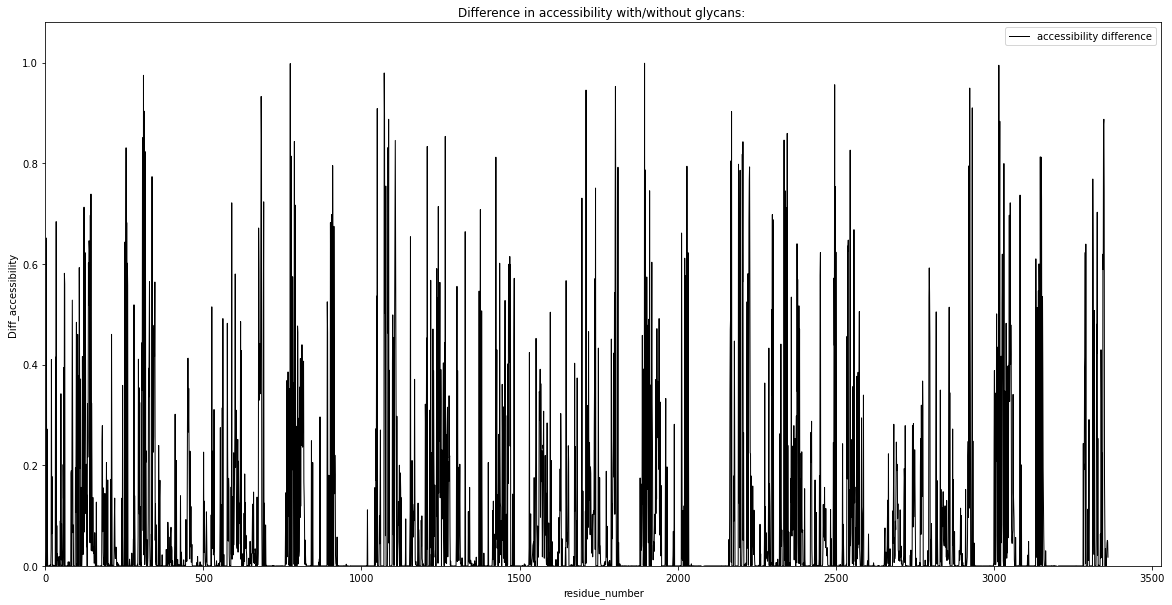

In [4]:
files1 = ['5.0.5.SiteSpecific.n.csv', '5.1.5.SiteSpecific.n.csv', '5.2.5.SiteSpecific.n.csv']
files2 = ['5.0.5.SiteSpecific.csv', '5.1.5.SiteSpecific.csv', '5.2.5.SiteSpecific.csv']

t1 = read_list_of_accessibility_files(files1)
df1 = t1.output()

t2 = read_list_of_accessibility_files(files2)
df2 = t2.output()

df_ls = [df1, df2]
inst1 = diff(df_ls)
x = inst1.output()


In [5]:
x #dataframe that shows the difference in accessibility of protein with glycan and without glycans

,residue_number,Avg_accessibility1,Avg_accessibility2,Diff_accessibility
0,1,1.000000,1.000000,0.000000
1,2,1.000000,0.989333,0.010667
2,3,0.030667,0.000667,0.030000
3,4,0.720000,0.068667,0.651333
4,5,0.000000,0.000000,0.000000
...,...,...,...,...
3355,3356,0.795333,0.766667,0.028667
3356,3357,0.513333,0.467333,0.046000
3357,3358,0.849333,0.798667,0.050667
3358,3359,0.984000,0.936000,0.048000


In [6]:
#read pdb file and replace the column with their average accesssibility

class update_pdb_file:
    def __init__(self, pdb_file, df1 ):
        self.pdb_file = pdb_file
        self.df1 =df1
    
    def output(self):
        return (self.convert_pdb_to_csv())
    
    def convert_pdb_to_csv(self):
        #cleaning the original pdb file 
        import re
        
        data = []
        with open(self.pdb_file, 'r') as fp:
            for line in fp:
                if 'TER' in(line) or 'END' in(line):
                    pass
                else:
                    ls = re.split('\s+', line)
                    ls.pop()
                    data.append(ls)
                    
        #making dataframe
        pdb_df = pd.DataFrame(data)
        pdb_df = pdb_df.astype({4:'int'})
        
        return(self.update_pdb_df(pdb_df))
        
    def residue_number_Avg_accessibility_pair(self):
        #extract a key-value pair for the Avg_accessibility

        dict1 = self.df1[['residue_number', 'Avg_accessibility']].set_index(str('residue_number')).to_dict()['Avg_accessibility']
        return(dict1)
        
    def update_pdb_df(self, pdb_df) :
        dict1 = self.residue_number_Avg_accessibility_pair()
        # Mapping the dictionary keys to the data frame.
        pdb_df['Avg_accessibility'] = pdb_df[4].map(dict1, na_action = 'ignore')
        pdb_df['Avg_accessibility'] = pdb_df['Avg_accessibility'].replace(np.nan, 1.00) #repalcing all the residue which are not accessible due to glycans with 1.00
        csv_file_output_name = (self.pdb_file.split('/')[-1]).split('.')[0]
        pdb_df.to_csv('./output/' + csv_file_output_name +  '_updated.csv', float_format ='%.6f')
        
#         print(pdb_df.head(50))
#         print(pdb_df.tail(20))


In [7]:
pdb_file_update_inst1 = update_pdb_file('./data/CPLX.pdb', df1)
pdb_file_update_inst1 .output()

In [8]:
################End_of_Script################

In [9]:
#junk /scratch work